# Clasificación del Carácter Docente según Título, Institución y Espacio Curricular
Este notebook utiliza el dataset limpio para predecir el `Carácter` (Docente, Habilitante, Suplente)
según el `titulo`, la `institución emisora (nombre)` y el `desc_espacio`.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Cargar dataset limpio
df = pd.read_csv('C:/Users/Usuario/OneDrive/Documentos/BASE_DE_DATOS_E_INTELIGENCIA_ARTIFICIAL/2025/APRENDIZAJE AUTOMATICO (2A1C)/PARCIAL/Clasificacion_Asignacion_DocentesTDF/data/processed/dataset_docentes_etl.csv')


In [3]:
# aseguramos que no haya nulos relevantes
df = df.dropna(subset=['caracter', 'titulo', 'nombre', 'desc_espacio'])  

In [4]:
# Selección de variables
X = df[['titulo', 'nombre', 'desc_espacio']]
y = df['caracter']

In [5]:
# Codificación One-Hot
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X)
X_encoded.shape

(51626, 4754)

In [6]:
# División de datos
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

In [7]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


              precision    recall  f1-score   support

     Docente       0.87      0.89      0.88      3934
 Habilitante       0.85      0.91      0.88      3940
  Supletorio       0.81      0.70      0.75      2452

    accuracy                           0.85     10326
   macro avg       0.84      0.83      0.84     10326
weighted avg       0.85      0.85      0.85     10326



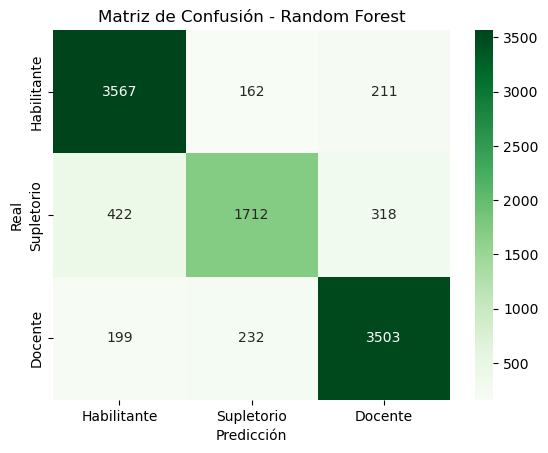

In [8]:
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=['Habilitante', 'Supletorio', 'Docente'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Habilitante', 'Supletorio', 'Docente'], yticklabels=['Habilitante', 'Supletorio', 'Docente'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Random Forest')
plt.show()

El reporte de Clasificación de este modelo indica que es muy buena la precisión para la clasificación como docente y el de habilitante es bueno, en este caso para el caracter Supletorio, el modelo mejora en exactitud. En cuento a Recall, es Muy bueno poder para detectar docentes reales, y en este modelo tiene una Altísima capacidad de detectar habilitantes, y en el caso de los supletorios El modelo mejora en exactitud. En cuanto al F1Socre el de caracter docente tiene Muy buen poder para detectar docentes reales, en el caso del habilitantes es muy sólido y el de supletorio, igual que otros modelos, esta clase sigue siendo difícil. El Accuracy total tiene 85% , El modelo acierta 85 de cada 100 casos.
La matriz de confusión para un modelo de Random Forest muestra cómo se clasificaron las diferentes categorías de un conjunto de datos. La mayoría de las predicciones fueron correctas: por ejemplo, 3567 personas calificadas como "Habilitante" fueron correctamente clasificadas en esa categoría, y lo mismo ocurrió con las otras categorías, como "Docente" con 3503 correctamente clasificadas. Sin embargo, también hubo errores, como 162 personas que en realidad eran "Habilitante" pero fueron clasificadas como "Supletorio", y 199 que eran "Docente" pero se clasificaron como "Habilitante". En general, la matriz indica que el modelo tiene un buen rendimiento en la clasificación, pero aún presenta algunas confusiones entre las categorías.